## Urban air pollution project


### TOC (table of content)
1. [Load packages](#loading_packages)
2. [Load data](#loading_data)
3. [EDA technical](#technical_eda)
4. [Hypothesis](#hypothesis)

5. [Feature engineering](#feature_engineering)


<a id='loading_packages'/>

Loading packages

In [47]:
import pandas as pd
import numpy as np

from time import time

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
# from sklearn.inspection import plot_partial_dependence

from scipy.stats import zscore
from sklearn.pipeline import Pipeline

# Import functions from own Python-File (see visuals_script.py in Repo)
#import visuals_script as vs

# Pretty display for notebooks
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
RSEED=42


## TOC
### Import data

<a id='loading_data'/>

Loading Data

In [4]:
df = pd.read_csv('data/Train.csv')

<a id='technical_eda'/>

EDA Technical

In [5]:
pd.set_option('display.max_rows',10)
df.columns


Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [6]:
df.shape

(30557, 82)

In [7]:
df.dtypes

Place_ID X Date                  object
Date                             object
Place_ID                         object
target                          float64
target_min                      float64
                                 ...   
L3_CH4_aerosol_optical_depth    float64
L3_CH4_sensor_azimuth_angle     float64
L3_CH4_sensor_zenith_angle      float64
L3_CH4_solar_azimuth_angle      float64
L3_CH4_solar_zenith_angle       float64
Length: 82, dtype: object

In [8]:
df.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [9]:
df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

In [11]:
df.duplicated().value_counts()

False    30557
Name: count, dtype: int64

#### check outliers for target

(0.0, 100.0)

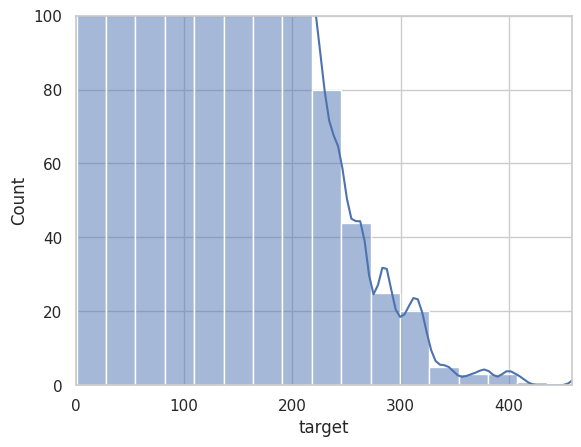

In [12]:
sns.histplot(df, x='target', bins=30, kde=True)
plt.xlim(0, 458)
plt.ylim(00, 100)

<Axes: >

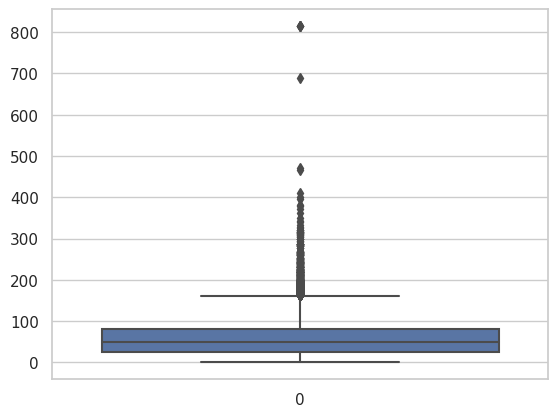

In [13]:
sns.boxplot(df['target'])

we see that the data are exponentially distributed. The box plot shows very high amount of outliers. However, because of the exponential distribution, we can log transfor the target value to reduce the number of 'actual' outliers.

<Axes: >

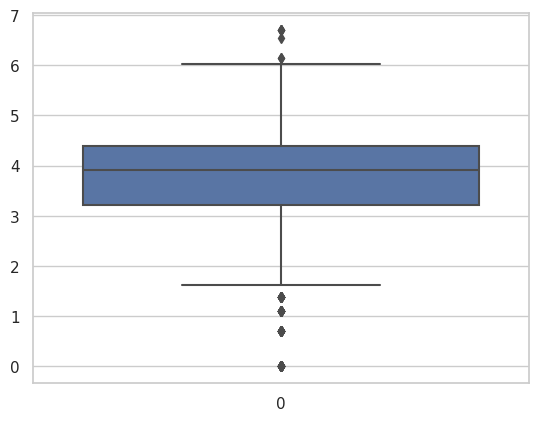

In [14]:
sns.boxplot(df['target'].apply(np.log))

Conclusion is we need to set the treshold: the following code calculates the maximum value for the target that we will use for the training. (this is: we remove the highest seven points).

In [15]:
q1=df['target'].apply(np.log).quantile(0.25)
q3=df['target'].apply(np.log).quantile(0.75)
IQR=q3-q1
max_target = np.exp((q3+1.5*IQR)) 
print(max_target)

457.9467217919567


Hypothsis
<a id='hypothesis'/>

- higher gas column densities, higher target value
- Q: higher wind velocity, lower target value?
    A: true
- humidity correlated non-linearly with target value
- satellite angle correlates with measured column density
- stratospheric column density no correlation with target value
- aerosol index with target value
- AER_AI_sensor_altitude  nega-corr target value

H1: higher gas column densities, higher target value

In [16]:
df.corr(numeric_only=True).iloc[0].sort_values(ascending=False)

target                                             1.000000
target_min                                         0.818803
target_max                                         0.630801
L3_CO_CO_column_number_density                     0.375737
L3_HCHO_tropospheric_HCHO_column_number_density    0.347125
                                                     ...   
L3_HCHO_solar_azimuth_angle                       -0.181548
L3_O3_solar_azimuth_angle                         -0.185363
L3_CLOUD_solar_azimuth_angle                      -0.187643
L3_AER_AI_solar_azimuth_angle                     -0.193434
L3_AER_AI_sensor_altitude                         -0.308308
Name: target, Length: 79, dtype: float64

In [17]:
pd.set_option('display.max_rows',20)

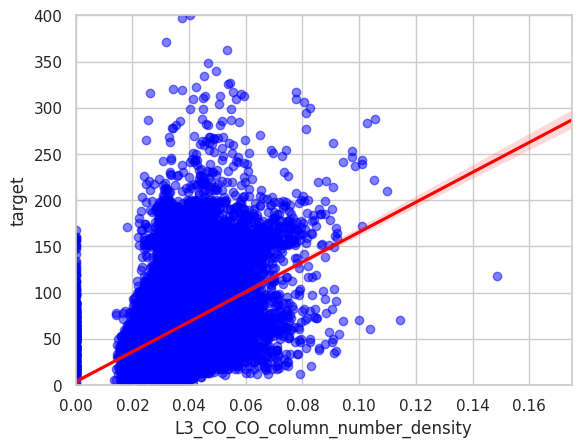

In [18]:
sns.regplot(df, x = 'L3_CO_CO_column_number_density', y = 'target',
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}
           )
plt.xlim(0, 0.175)
plt.ylim(0, 400)
plt.show()

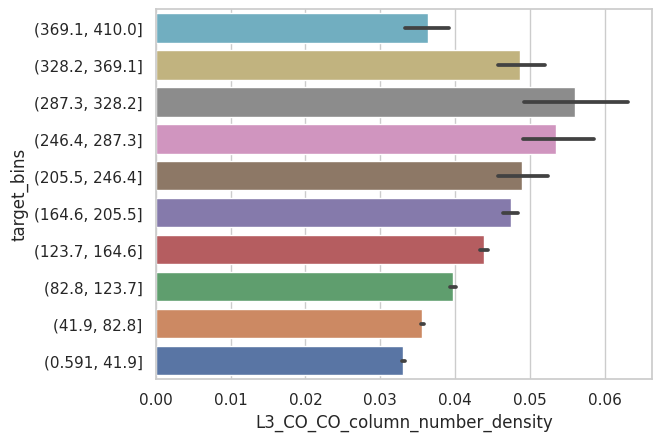

In [19]:
df_1 = df[df['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='L3_CO_CO_column_number_density', y='target_bins').invert_yaxis()

H2: - Q: higher wind velocity, lower target value?
    A: true

In [20]:
df_abs = df_temp.copy()
df_abs['u_component_of_wind_10m_above_ground'] = df_temp['u_component_of_wind_10m_above_ground'].abs()

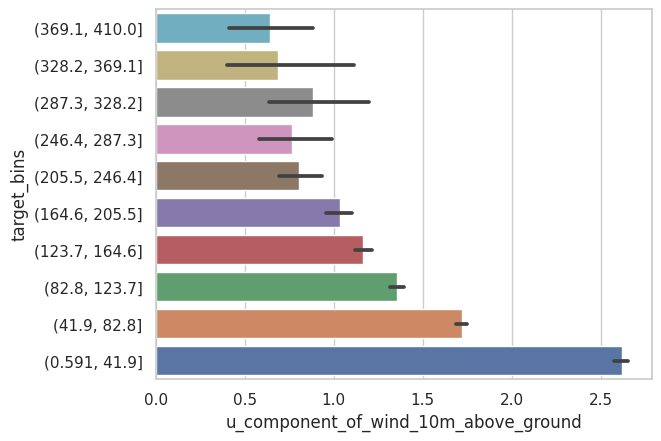

In [21]:
sns.barplot(df_abs, x='u_component_of_wind_10m_above_ground', y='target_bins').invert_yaxis()

H3: - humidity correlated non-linearly with target value

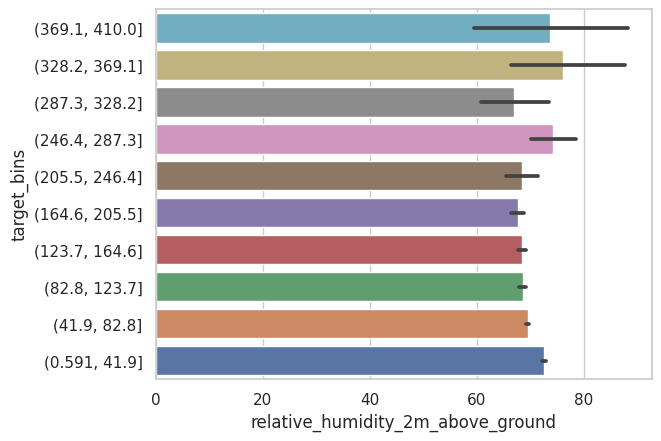

In [22]:
sns.barplot(df_temp, x='relative_humidity_2m_above_ground', y='target_bins').invert_yaxis()
#plt.xlim(60, 100)
#plt.show()

Feature Engineering
<a id='feature_engineering'/>

In [23]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [24]:
df[df['Place_ID']=='010Q650']




,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,010Q650 X 2020-03-31,2020-03-31,010Q650,48.0,23.0,65.0,1496.32,92,8.600000,23.100000,...,10.169529,-40.440034,48.432810,1800.570905,3029.457596,0.006249,-98.571270,11.543664,-40.678484,48.519973
90,010Q650 X 2020-04-01,2020-04-01,010Q650,58.0,35.0,73.0,600.52,92,9.200000,37.000000,...,21.307825,-34.766504,46.465054,1783.272687,3104.801784,0.013980,72.930353,20.014185,-35.052718,46.539563
91,010Q650 X 2020-04-02,2020-04-02,010Q650,59.0,51.0,73.0,261.12,96,5.670641,32.600002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,010Q650 X 2020-04-03,2020-04-03,010Q650,61.0,52.0,69.0,210.58,96,6.100000,17.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


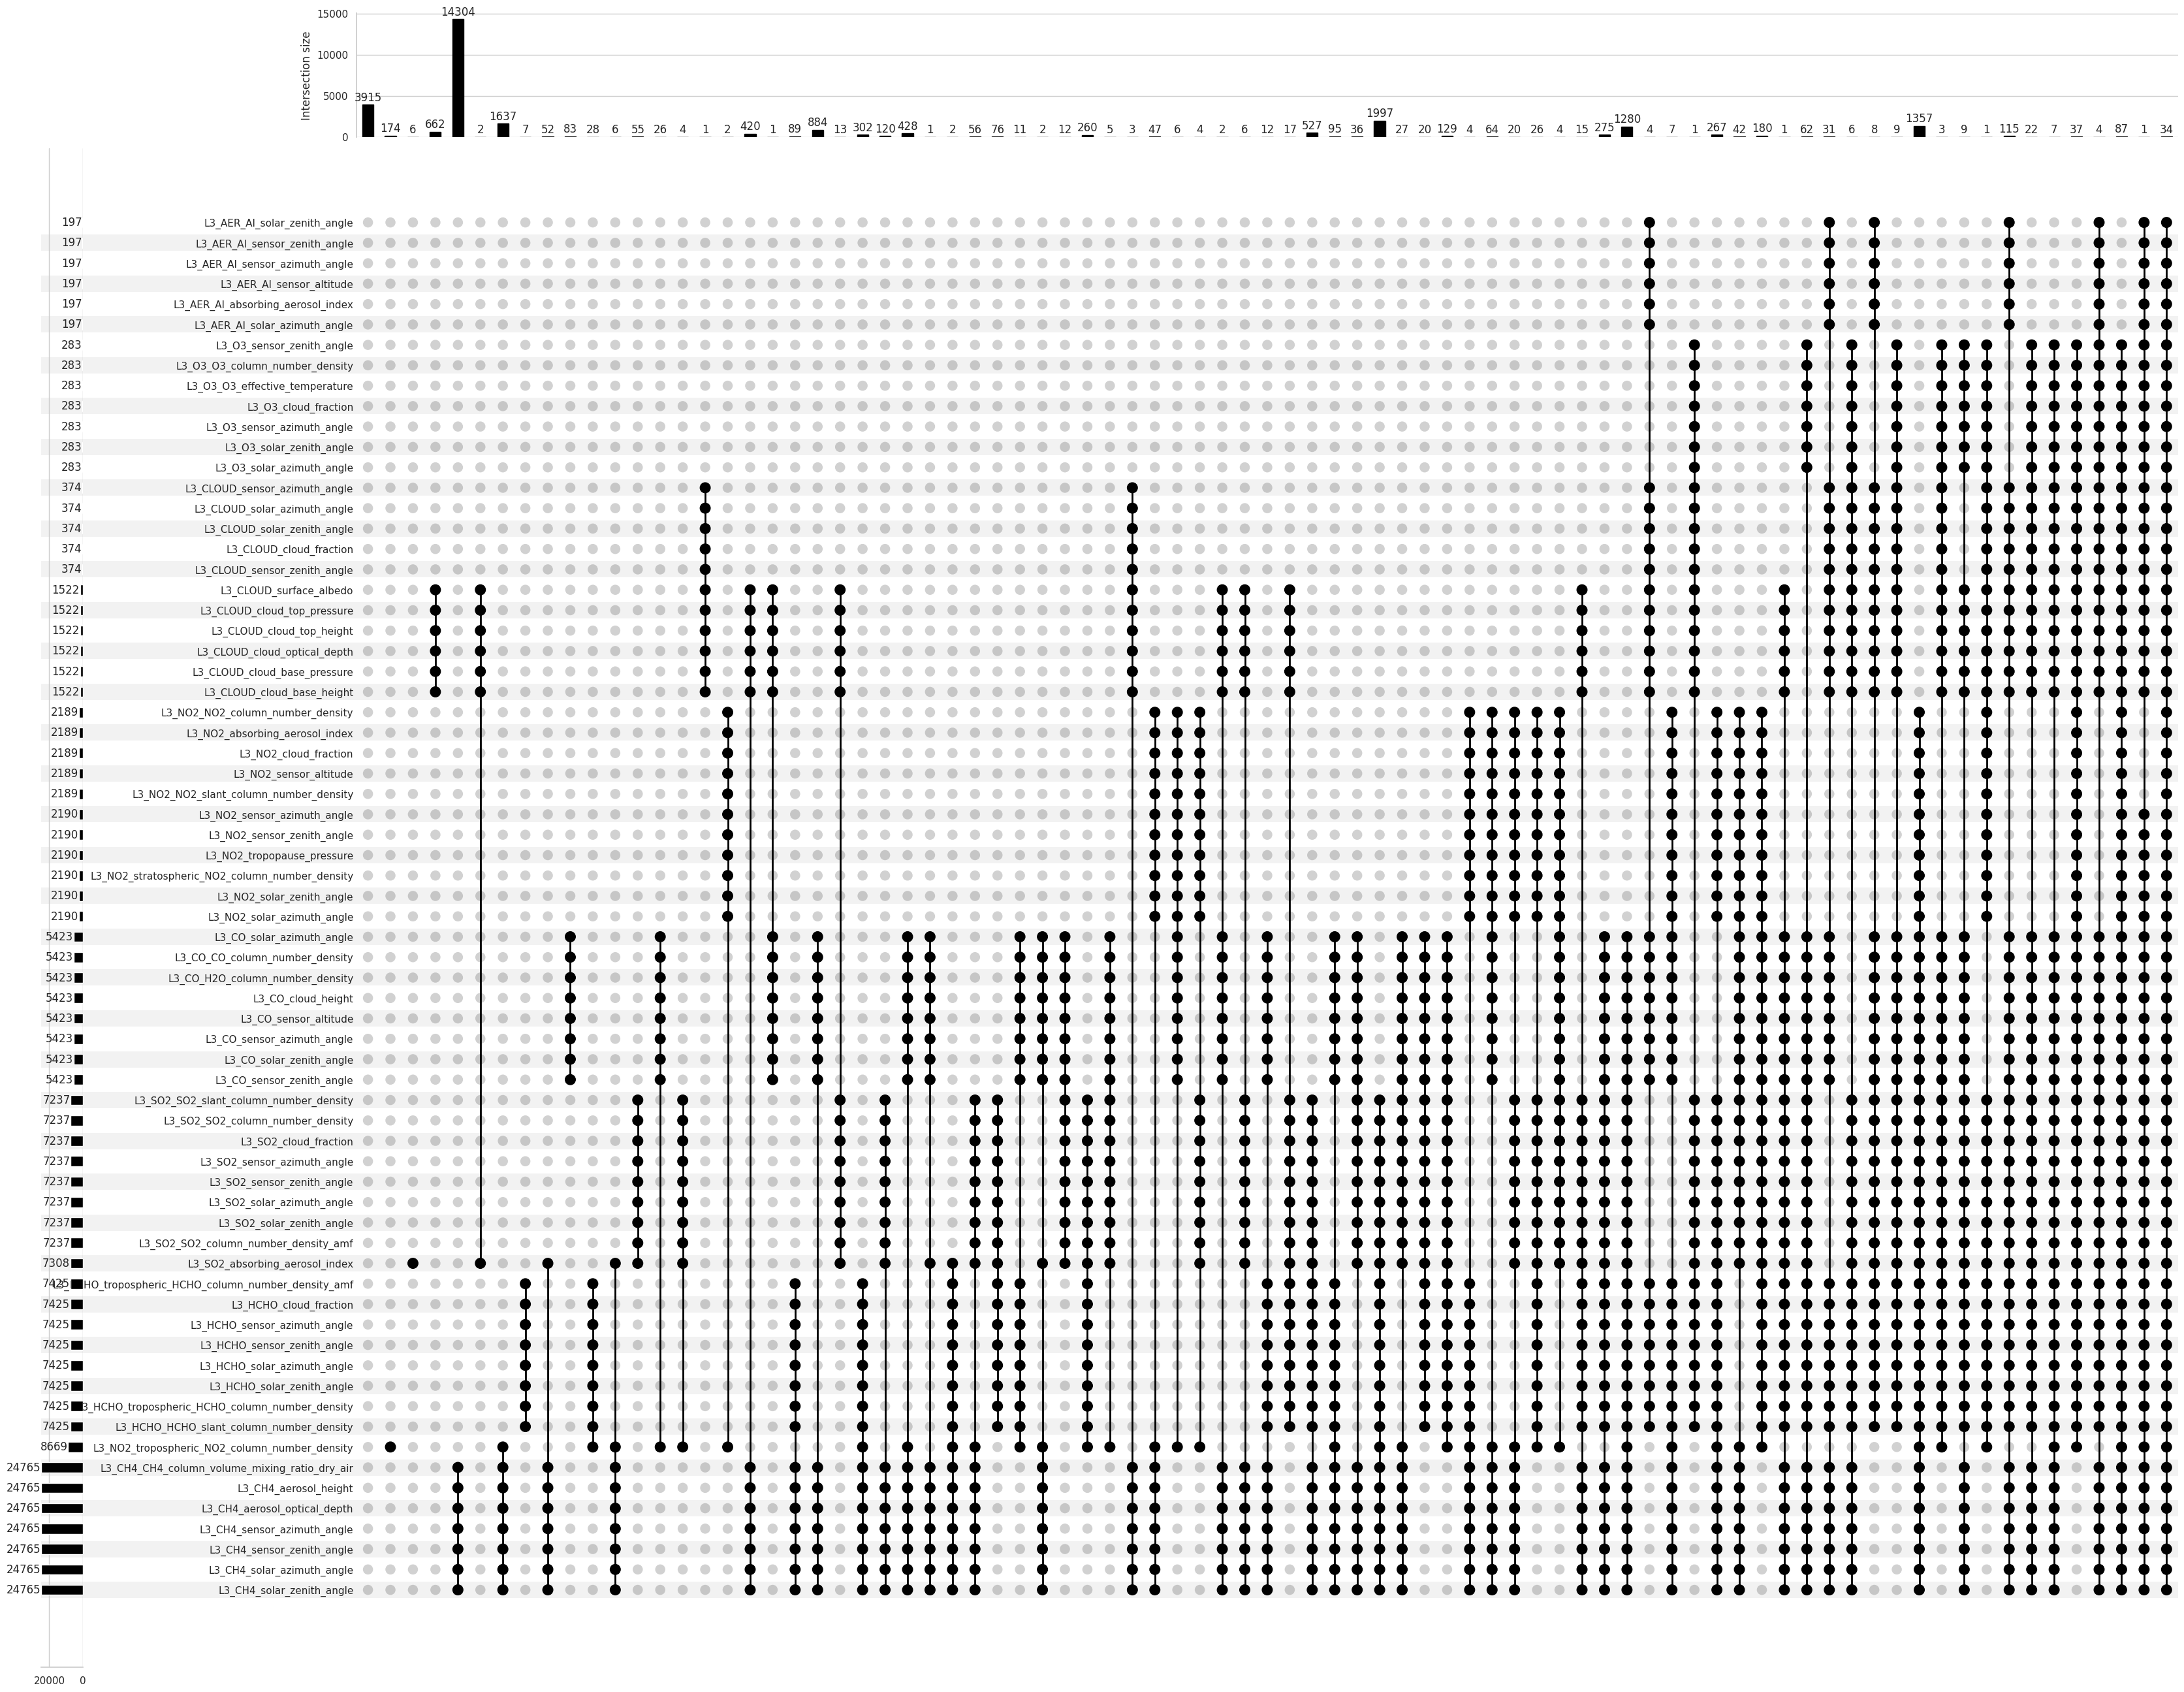

In [25]:
from matplotlib import pyplot as plt
import pandas as pd
from upsetplot import plot, from_indicators

data = df

plot(from_indicators(indicators=pd.isna, data=data), show_counts=True)
plt.show()

<Axes: xlabel='L3_AER_AI_sensor_altitude', ylabel='target'>

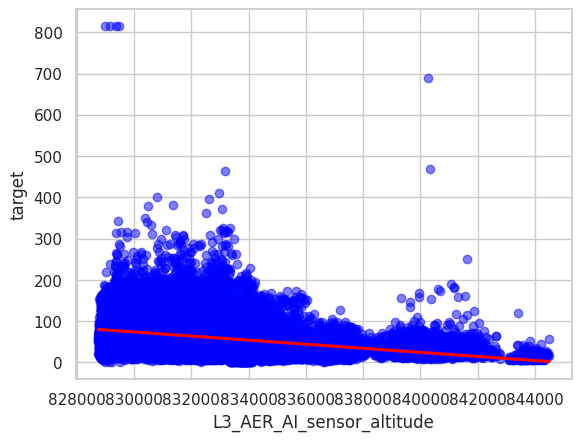

In [26]:
sns.regplot(df, x = 'L3_AER_AI_sensor_altitude', y = 'target',
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}
           )

In [27]:
df[df['Place_ID']=='0GBXTHY']['Date'].isna().sum()

0

In [28]:
df[df['Place_ID']=='0GBXTHY']['L3_CO_CO_column_number_density'].isna().sum()

50

In [29]:
df[df['Place_ID']=='0GBXTHY']['L3_CO_CO_column_number_density'].count()

44

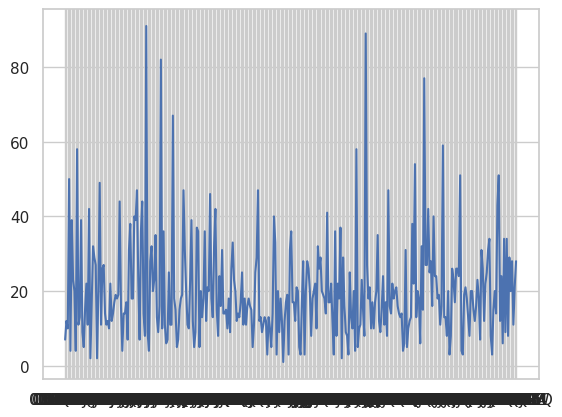

In [30]:
p_co_missing=94-df.groupby('Place_ID')['L3_CO_CO_column_number_density'].count()

plt.plot(p_co_missing)

In [31]:
miss = df.groupby('Place_ID')['L3_CO_CO_column_number_density'].apply(lambda x: x.isna().sum())

count = df.groupby('Place_ID')['Date'].count()

percent = miss/count

<Axes: xlabel='Date', ylabel='target'>

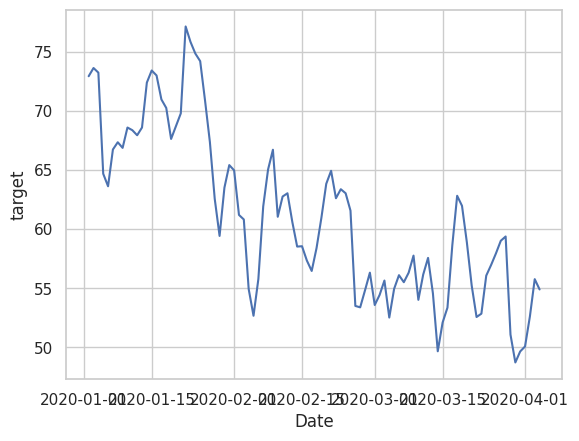

In [32]:

df.groupby('Date')['target'].mean().reset_index()

sns.lineplot(df.groupby('Date')['target'].mean().reset_index(), x='Date', y='target')

In [33]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
#print(missing_percentage)
positive_missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)


pd.set_option('display.max_rows',None)

print(pd.DataFrame(positive_missing_percentage))

pd.set_option('display.max_rows',10)

                                                            0
L3_CH4_solar_zenith_angle                           81.045260
L3_CH4_solar_azimuth_angle                          81.045260
L3_CH4_sensor_zenith_angle                          81.045260
L3_CH4_sensor_azimuth_angle                         81.045260
L3_CH4_aerosol_optical_depth                        81.045260
L3_CH4_aerosol_height                               81.045260
L3_CH4_CH4_column_volume_mixing_ratio_dry_air       81.045260
L3_NO2_tropospheric_NO2_column_number_density       28.369932
L3_HCHO_HCHO_slant_column_number_density            24.298851
L3_HCHO_tropospheric_HCHO_column_number_density     24.298851
L3_HCHO_solar_zenith_angle                          24.298851
L3_HCHO_solar_azimuth_angle                         24.298851
L3_HCHO_sensor_zenith_angle                         24.298851
L3_HCHO_sensor_azimuth_angle                        24.298851
L3_HCHO_cloud_fraction                              24.298851
L3_HCHO_

In [34]:
dict=pd.DataFrame(positive_missing_percentage).sort_values(by=0).to_dict()

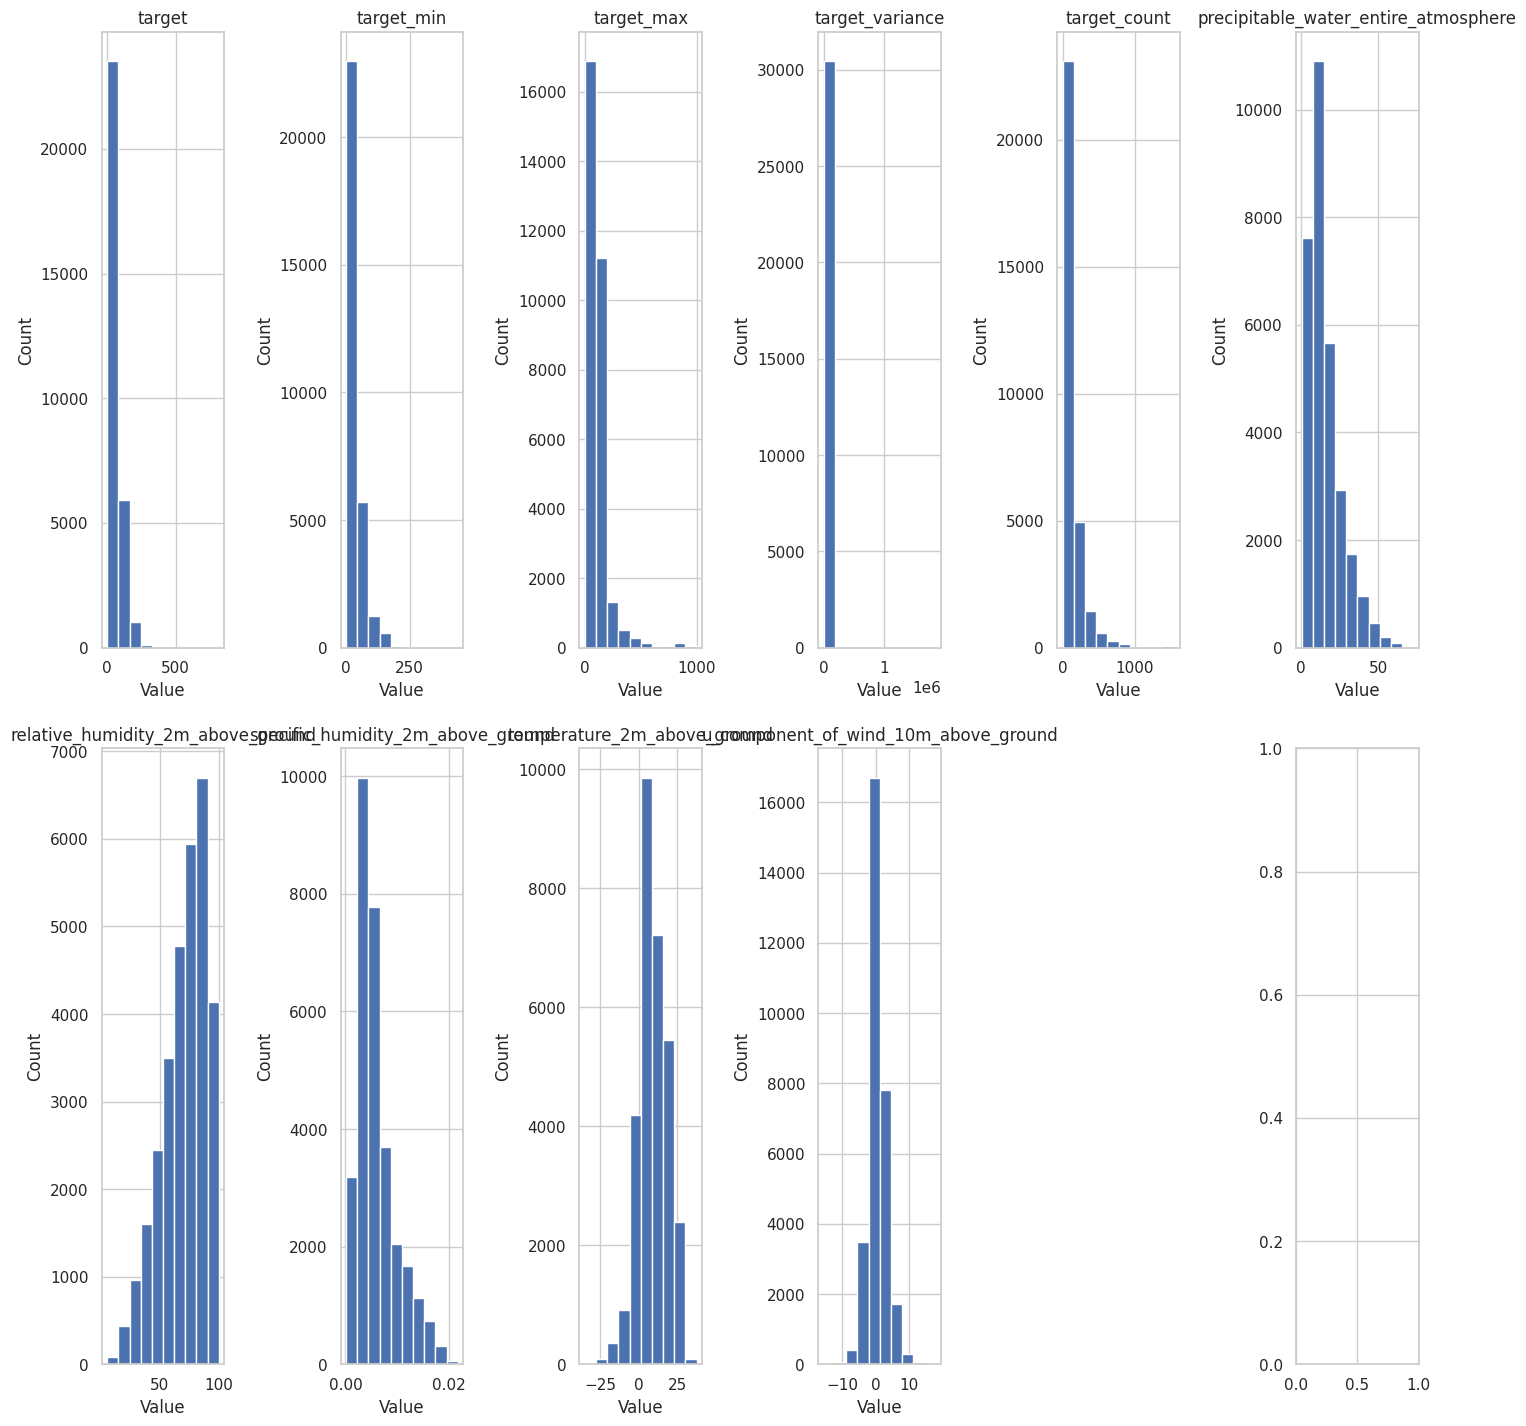

In [35]:
# Determine grid size based on number of features

new_features=df.select_dtypes('number').columns[0:10]
n = len(new_features)
ncols = 6  # number of columns in the grid
nrows = n // ncols + (n % ncols > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
fig.tight_layout(pad=4.0)
for ax, feature in zip(axes.ravel(), new_features):
    df[feature].hist(ax=ax)
    ax.set_title(feature)
    ax.set_ylabel('Count')
    ax.set_xlabel('Value')# Remove any unused subplots
for idx in range(n, nrows * ncols):
    fig.delaxes(axes.flatten()[idx])
    plt.show()

In [36]:
(df['L3_CLOUD_cloud_base_pressure']==0).isna().sum()


0

In [37]:
df[(df['L3_CO_sensor_altitude']<80000) & (df['L3_CO_sensor_altitude']>0) ]['L3_CO_sensor_altitude']

Series([], Name: L3_CO_sensor_altitude, dtype: float64)

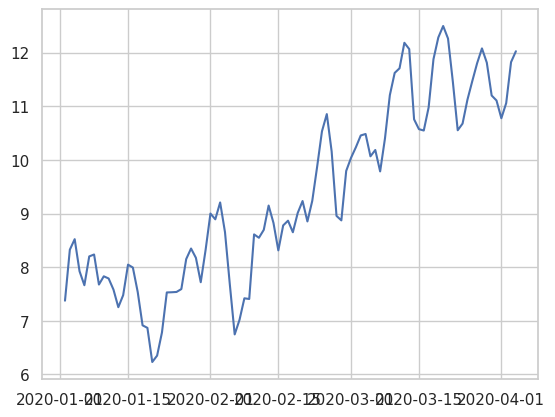

In [38]:
plt.plot(df.groupby(['Date'])['temperature_2m_above_ground'].mean())

In [39]:

pd.set_option('display.max_rows',None)

(df['L3_SO2_SO2_column_number_density'] < -0.01).sum() 

11

In [40]:
# 1. No Missing Value, Apply Standard Scaler:
features_standard_scaler = [
    'precipitable_water_entire_atmosphere',
    'relative_humidity_2m_above_ground',
    'specific_humidity_2m_above_ground',
    'temperature_2m_above_ground',
    'u_component_of_wind_10m_above_ground',
    'v_component_of_wind_10m_above_ground'
]# 2. Outliers Present, Missing Values, KNN Impute, Apply Standard Scaler:
features_knn_standard_scaler = [
    'L3_NO2_NO2_column_number_density',
    'L3_NO2_NO2_slant_column_number_density',
    'L3_NO2_absorbing_aerosol_index',
    'L3_NO2_sensor_azimuth_angle',
    'L3_NO2_solar_azimuth_angle',
    'L3_NO2_solar_zenith_angle',
    'L3_NO2_tropospheric_NO2_column_number_density',
    'L3_O3_O3_column_number_density',
    'L3_O3_O3_effective_temperature',
    'L3_O3_solar_azimuth_angle',
    'L3_O3_solar_zenith_angle',
    'L3_CO_CO_column_number_density',
    'L3_CO_H2O_column_number_density',
    'L3_CO_cloud_height',
    'L3_CO_sensor_altitude',
    'L3_CO_sensor_azimuth_angle',
    'L3_CO_solar_zenith_angle',
    'L3_HCHO_HCHO_slant_column_number_density',
    'L3_HCHO_solar_zenith_angle',
    'L3_HCHO_tropospheric_HCHO_column_number_density',
    'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
    'L3_CLOUD_cloud_base_height',
    'L3_CLOUD_cloud_optical_depth',
    'L3_CLOUD_cloud_top_height',
    'L3_SO2_SO2_column_number_density',
    'L3_SO2_SO2_slant_column_number_density',
    'L3_SO2_absorbing_aerosol_index',
    'L3_SO2_solar_zenith_angle',
    'L3_CLOUD_cloud_base_pressure',
    'L3_CLOUD_cloud_top_pressure',
    'L3_CLOUD_solar_zenith_angle',
    'L3_CLOUD_surface_albedo',
    'L3_AER_AI_absorbing_aerosol_index',
    'L3_AER_AI_sensor_altitude',
    'L3_AER_AI_solar_zenith_angle',
    'L3_SO2_SO2_column_number_density_amf'
]# 3. Only KNN Impute:
features_knn_only = [
    'L3_NO2_cloud_fraction',
    'L3_O3_cloud_fraction',
    'L3_HCHO_cloud_fraction',
    'L3_CLOUD_cloud_fraction'
]# 4. KNN Impute and Apply Min-Max Scaler:
features_knn_minmax = [
    'L3_NO2_sensor_zenith_angle',
    'L3_O3_sensor_zenith_angle',
    'L3_CO_sensor_zenith_angle',
    'L3_CO_solar_azimuth_angle',
    'L3_HCHO_sensor_zenith_angle',
    'L3_HCHO_solar_azimuth_angle',
    'L3_CLOUD_sensor_zenith_angle',
    'L3_AER_AI_sensor_zenith_angle',
    'L3_AER_AI_solar_azimuth_angle',
    'L3_SO2_sensor_zenith_angle',
    'L3_SO2_solar_azimuth_angle'
]

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# bin numerical data, scale data, encode data
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, OneHotEncoder  
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression



In [42]:
features=df[features_standard_scaler + features_knn_standard_scaler + features_knn_only + features_knn_minmax]
target=df[['target']]



In [43]:
# Sub - Pipelines

pipeline_standard_Scaler     = Pipeline([
                                        ( 'standard_scaler', StandardScaler() ),
                                        ])

pipeline_standard_Scaler_knn = Pipeline([
                                        ( 'imputer',         KNNImputer()     ),
                                        ( 'standard_scaler', StandardScaler() ),
                                        ])


pipeline_knn                = Pipeline([
                                        ( 'KNN_impute',      KNNImputer()     ),   
                                        ])


pipeline_knn_and_minmax     = Pipeline([
                                        ( 'KNN_impute',      KNNImputer()     ),   
                                        ( 'minmax',          MinMaxScaler()   ),
                                        ]) 

# Column Transformer


my_column_transfomer        = ColumnTransformer([
                                                ( 'standardscale',               pipeline_standard_Scaler,       features_standard_scaler     ),
                                                ( 'KNNimpute_and_standardscale', pipeline_standard_Scaler_knn,   features_knn_standard_scaler ),
                                                ( 'KNNimpute',                   pipeline_knn,                   features_knn_only            ),
                                                ( 'KNNimpute_and_MinMaxScale',   pipeline_knn_and_minmax,        features_knn_minmax          ),
                                                ], remainder='drop')

# Main Pipeline

pipeline_model              = Pipeline([
                                       ('ct',    my_column_transfomer ),
                                       ('model', LinearRegression() ),
                                       ])


# Split Data
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=None, random_state=777, test_size=0.8)

In [45]:
df.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [163]:
z_scores = zscore(df['target'])#.select_dtypes(exclude=['object','datetime64[ns]']),nan_policy='omit')

df2=df[ (np.abs(z_scores)<7) ]



(28490, 82)

In [ ]:

pd.DataFrame(my_column_transfomer.fit(X_test))




In [ ]:
df[features_standard_scaler].isna().sum()

In [ ]:
z_scores = zscore(df.select_dtypes(exclude=['object','datetime64[ns]']),nan_policy='omit')

df[ (np.abs(z_scores)<7).any(axis=1) ].shape





target                                                 16.087137
target_min                                             12.348539
target_max                                              8.773573
target_variance                                        37.703110
target_count                                            9.729664
precipitable_water_entire_atmosphere                    5.360735
relative_humidity_2m_above_ground                       1.565712
specific_humidity_2m_above_ground                       4.121985
temperature_2m_above_ground                             3.009350
u_component_of_wind_10m_above_ground                    6.476583
v_component_of_wind_10m_above_ground                    5.665299
L3_NO2_NO2_column_number_density                             NaN
L3_NO2_NO2_slant_column_number_density                       NaN
L3_NO2_absorbing_aerosol_index                               NaN
L3_NO2_cloud_fraction                                        NaN
L3_NO2_sensor_altitude   